This lenk contains problem statement
https://www.cmi.ac.in/~madhavan/courses/dmml2024/assignment1/

**1.Importing necessary library**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import get_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_validate, GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib as plt
import pandas as pd
import numpy as np

Dividing the data-set into two parts.

In [ ]:
df = pd.read_csv("/content/customer-churn-data.csv")
X = df.iloc[: , :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[1 62 'Other' ... 129 True 'Responded']
 [2 65 'Male' ... 227 False 'Responded']
 [3 18 'Male' ... 283 False 'Responded']
 ...
 [998 47 'Female' ... 172 True 'Unsubscribed']
 [999 23 'Male' ... 55 False 'Responded']
 [1000 34 'Other' ... 269 True 'Ignored']]


here we can see some columns contains categorical data. to get rid of categorical data into numerical input we are using ColumnTransfer.

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,13])], remainder='passthrough')
X_new= np.array(ct.fit_transform(X))

Dividing the data into training set and test test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 34)

We are using adaboost classifier

In [ ]:
clfada = AdaBoostClassifier( n_estimators = 30, learning_rate = 1.0 ,algorithm="SAMME.R", random_state=34)
clfada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=34)

In [ ]:
y_train_fit = clfada.predict(X_train)
print(classification_report(y_train, y_train_fit))

              precision    recall  f1-score   support

       False       0.67      0.58      0.62       367
        True       0.64      0.73      0.68       383

    accuracy                           0.65       750
   macro avg       0.66      0.65      0.65       750
weighted avg       0.66      0.65      0.65       750



In [ ]:
y_pred = clfada.predict(X_test)

We are plotting the confusion matrix.

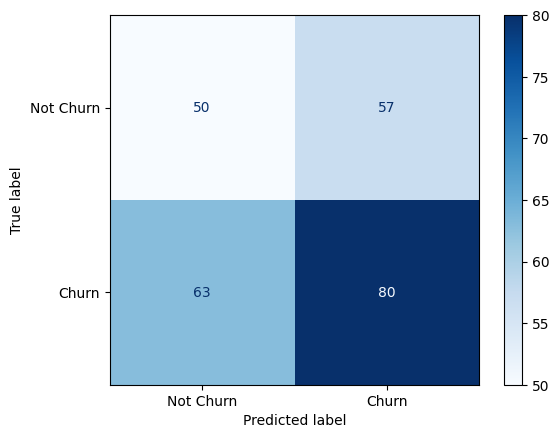

In [ ]:
cm = confusion_matrix(y_test , y_pred)
display = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
display.plot(cmap ="Blues")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.44      0.47      0.45       107
        True       0.58      0.56      0.57       143

    accuracy                           0.52       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.52      0.52      0.52       250



In [ ]:
accuracy_score(y_test , y_pred)

0.52

As we see we get accuracy 56%. we can try to improve it by tuning by using GridSearchCV

In [ ]:
param = {
    "n_estimators": [50,75,100],
    "learning_rate": [0.01,0.1,1.0],
    "random_state" :[4,10,20]
}

accuracy = get_scorer("accuracy")
clf1 = AdaBoostClassifier(algorithm = "SAMME.R",)


grid_search = GridSearchCV(
    estimator=clf1,
    param_grid=param,
    cv=50,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

AdaBoostClassifier(random_state=4)


In [ ]:
clf2 = AdaBoostClassifier( n_estimators = 90, learning_rate =2.0 ,algorithm="SAMME.R", random_state=4)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy_score(y_test , y_pred2)

0.516

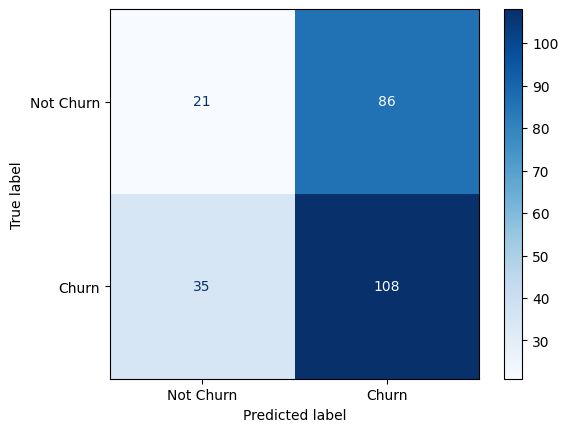

In [ ]:
cm = confusion_matrix(y_test , y_pred2)
display = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
display.plot(cmap ="Blues")

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.38      0.20      0.26       107
        True       0.56      0.76      0.64       143

    accuracy                           0.52       250
   macro avg       0.47      0.48      0.45       250
weighted avg       0.48      0.52      0.48       250



2. Random Forest

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=3,min_samples_split=6,min_samples_leaf =4,n_jobs=3, max_leaf_nodes = 10, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=10, min_samples_leaf=4,
                       min_samples_split=6, n_estimators=10, n_jobs=3,
                       random_state=0)

In [ ]:
y_rf_train_fit = clf_rf.predict(X_train)
print(classification_report(y_train, y_rf_train_fit))

              precision    recall  f1-score   support

       False       0.66      0.38      0.48       367
        True       0.58      0.81      0.67       383

    accuracy                           0.60       750
   macro avg       0.62      0.59      0.58       750
weighted avg       0.62      0.60      0.58       750



In [ ]:
y_rf_pred = clf_rf.predict(X_test)

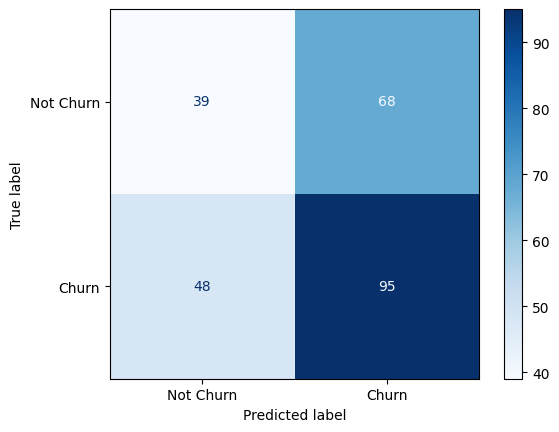

In [ ]:
cm = confusion_matrix(y_test , y_rf_pred)
display = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
display.plot(cmap ="Blues")

In [ ]:
accuracy_score(y_test, y_rf_pred)

0.536

In [ ]:
param = {
    "max_depth": range(2,7),
    "min_samples_split": range(3,7),
    "max_leaf_nodes": range(8,16,2),
    "min_samples_leaf" : range(2,6)
}

clf_rf = RandomForestClassifier(n_estimators=10,n_jobs=3, random_state=0)


grid_search = GridSearchCV(
    estimator=clf_rf,
    param_grid=param,
    cv=10,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, n_jobs=3,
                       random_state=0)


In [ ]:
clf_rf1 =RandomForestClassifier(max_depth=4, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, n_jobs=3,
                       random_state=0)
clf_rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, n_jobs=3,
                       random_state=0)

In [ ]:
y_rf1_train_fit = clf_rf1.predict(X_train)
print(classification_report(y_train, y_rf1_train_fit))

              precision    recall  f1-score   support

       False       0.75      0.52      0.61       367
        True       0.64      0.83      0.73       383

    accuracy                           0.68       750
   macro avg       0.70      0.68      0.67       750
weighted avg       0.70      0.68      0.67       750



In [ ]:
y_rf1_pred = clf_rf1.predict(X_test)

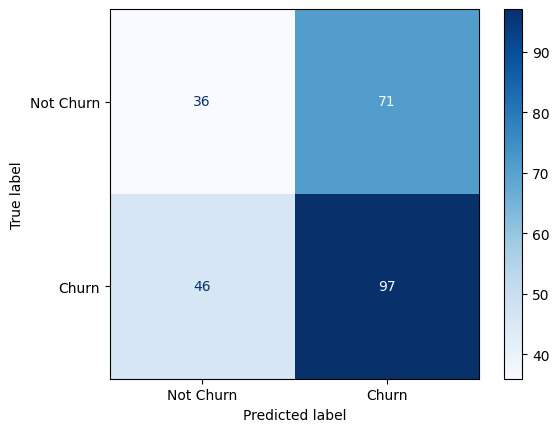

In [ ]:
cm = confusion_matrix(y_test , y_rf1_pred)
display = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
display.plot(cmap ="Blues")

In [ ]:
accuracy_score(y_test, y_rf1_pred)

0.532

In [ ]:
y_rf1_pred = clf_rf1.predict(X_test)
print(classification_report(y_test, y_rf1_pred))

              precision    recall  f1-score   support

       False       0.44      0.34      0.38       107
        True       0.58      0.68      0.62       143

    accuracy                           0.53       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.52      0.53      0.52       250

